## Import Libarires and dataframe

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
# Import dataframe
movie = pd.read_pickle('movie_1029.pkl')

In [5]:
# Chekcing the shape
movie.shape

(4438, 17)

## Data subseting, wrangling for time series analysis

In [6]:
# checking head
movie.head()

,budget,genres,popularity,Country,country_shortname,release_date,revenue,movie_duration,language,status,title,rating_average,vote_count,continent,duration_flag,recommend_flag,RevenueScale
0,237000000,Action,150.437577,United States of America,US,2009-12-10,2.787965e+09,162.0,en,Released,Avatar,7.2,11800.0,America,Long duration,Recommend,9.445287
1,300000000,Adventure,139.082615,United States of America,US,2007-05-19,9.610000e+08,169.0,en,Released,Pirates of the Caribbean: At World's End,6.9,4500.0,America,Long duration,Recommend,8.982723
2,245000000,Action,107.376788,United Kingdom,GB,2015-10-26,8.806746e+08,148.0,fr,Released,Spectre,6.3,4466.0,Europe,Long duration,Recommend,8.944815
3,250000000,Action,112.312950,United States of America,US,2012-07-16,1.084939e+09,165.0,en,Released,The Dark Knight Rises,7.6,9106.0,America,Long duration,Strong Recommend,9.035405
4,260000000,Action,43.926995,United States of America,US,2012-03-07,2.841391e+08,132.0,en,Released,John Carter,6.1,2124.0,America,Long duration,Recommend,8.453531


In [7]:
# Chelking data types
movie.dtypes

budget                 int64
genres                object
popularity           float64
Country               object
country_shortname     object
release_date          object
revenue              float64
movie_duration       float64
language              object
status                object
title                 object
rating_average       float64
vote_count           float64
continent             object
duration_flag         object
recommend_flag        object
RevenueScale         float64
dtype: object

In [9]:
# convert 'release_date' from object to time series data type
import datetime
movie['date_time'] = pd.to_datetime(pd.Series(movie['release_date']))

In [11]:
# Create a subset
movie_sub = movie.query('date_time >= "1980-01-01" and date_time <= "2020-12-31"')
movie_sub

,budget,genres,popularity,Country,country_shortname,release_date,revenue,movie_duration,language,status,title,rating_average,vote_count,continent,duration_flag,recommend_flag,RevenueScale,date_time
0,237000000,Action,150.437577,United States of America,US,2009-12-10,2.787965e+09,162.0,en,Released,Avatar,7.2,11800.0,America,Long duration,Recommend,9.445287,2009-12-10
1,300000000,Adventure,139.082615,United States of America,US,2007-05-19,9.610000e+08,169.0,en,Released,Pirates of the Caribbean: At World's End,6.9,4500.0,America,Long duration,Recommend,8.982723,2007-05-19
2,245000000,Action,107.376788,United Kingdom,GB,2015-10-26,8.806746e+08,148.0,fr,Released,Spectre,6.3,4466.0,Europe,Long duration,Recommend,8.944815,2015-10-26
3,250000000,Action,112.312950,United States of America,US,2012-07-16,1.084939e+09,165.0,en,Released,The Dark Knight Rises,7.6,9106.0,America,Long duration,Strong Recommend,9.035405,2012-07-16
4,260000000,Action,43.926995,United States of America,US,2012-03-07,2.841391e+08,132.0,en,Released,John Carter,6.1,2124.0,America,Long duration,Recommend,8.453531,2012-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,18449808,Drama,0.918116,United States of America,US,1995-09-09,4.635076e+07,98.0,en,Released,Bang,6.0,1.0,America,Middle duration,Not Recommend,7.666057,1995-09-09
4436,52520355,Science Fiction,23.307949,United States of America,US,2004-10-08,4.247600e+05,77.0,en,Released,Primer,6.9,658.0,America,Short duration,Recommend,5.628144,2004-10-08
4437,220000,Action,14.269792,Mexico,MX,1992-09-04,2.040920e+06,81.0,es,Released,El Mariachi,6.6,238.0,America,Short duration,Recommend,6.309826,1992-09-04
4438,19100162,Comedy,1.444476,United States of America,US,2013-10-13,5.238442e+07,120.0,en,Released,"Signed, Sealed, Delivered",7.0,6.0,America,Middle duration,Recommend,7.719202,2013-10-13


In [12]:
# Using groupby function to create another data subset
movie_1980 = movie_sub.groupby('date_time').agg({'revenue':['sum']})
movie_1980

,revenue
,sum
date_time,
1980-01-01,145188255.0
1980-02-08,21378361.0
1980-03-07,67182787.0
1980-05-12,15795189.0
1980-05-17,538400000.0
...,...
2016-08-17,94061311.0
2016-08-26,46350765.0


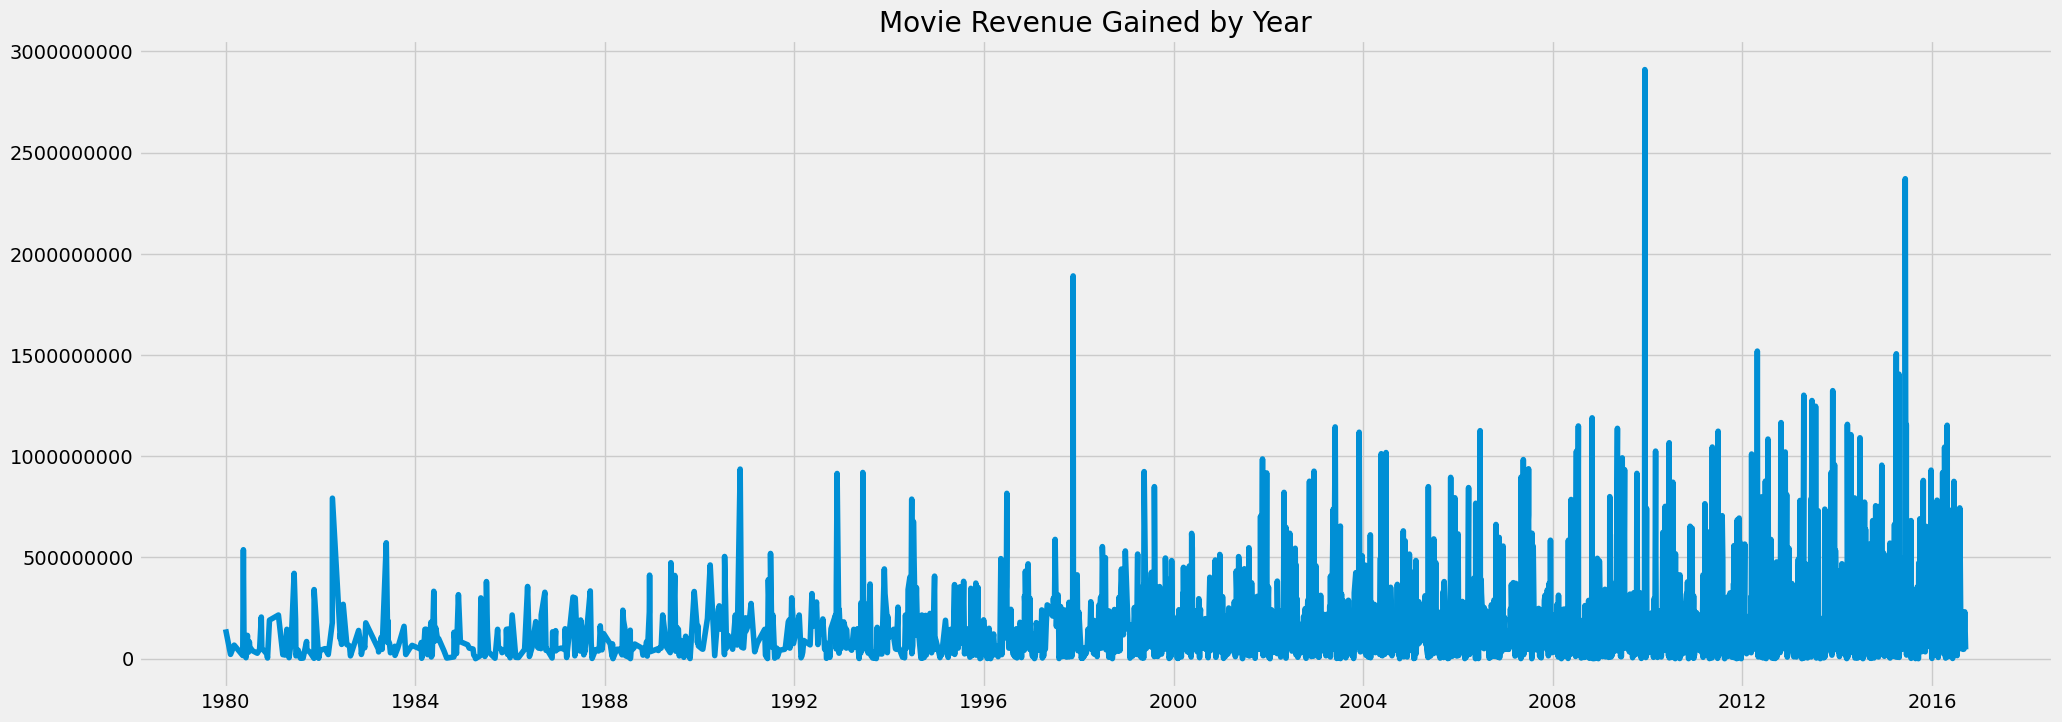

In [53]:
# plot the subset to show 
mpl.rcParams['figure.figsize'] = 22, 8
mpl.rcParams['font.size'] = 16
plt.style.use('fivethirtyeight')
plt.ticklabel_format(axis='y', style='plain')
plt.plot(movie_1980)
plt.title('Movie Revenue Gained by Year')
plt.show()

## Time Series Analysis Preparing

### Decompose 

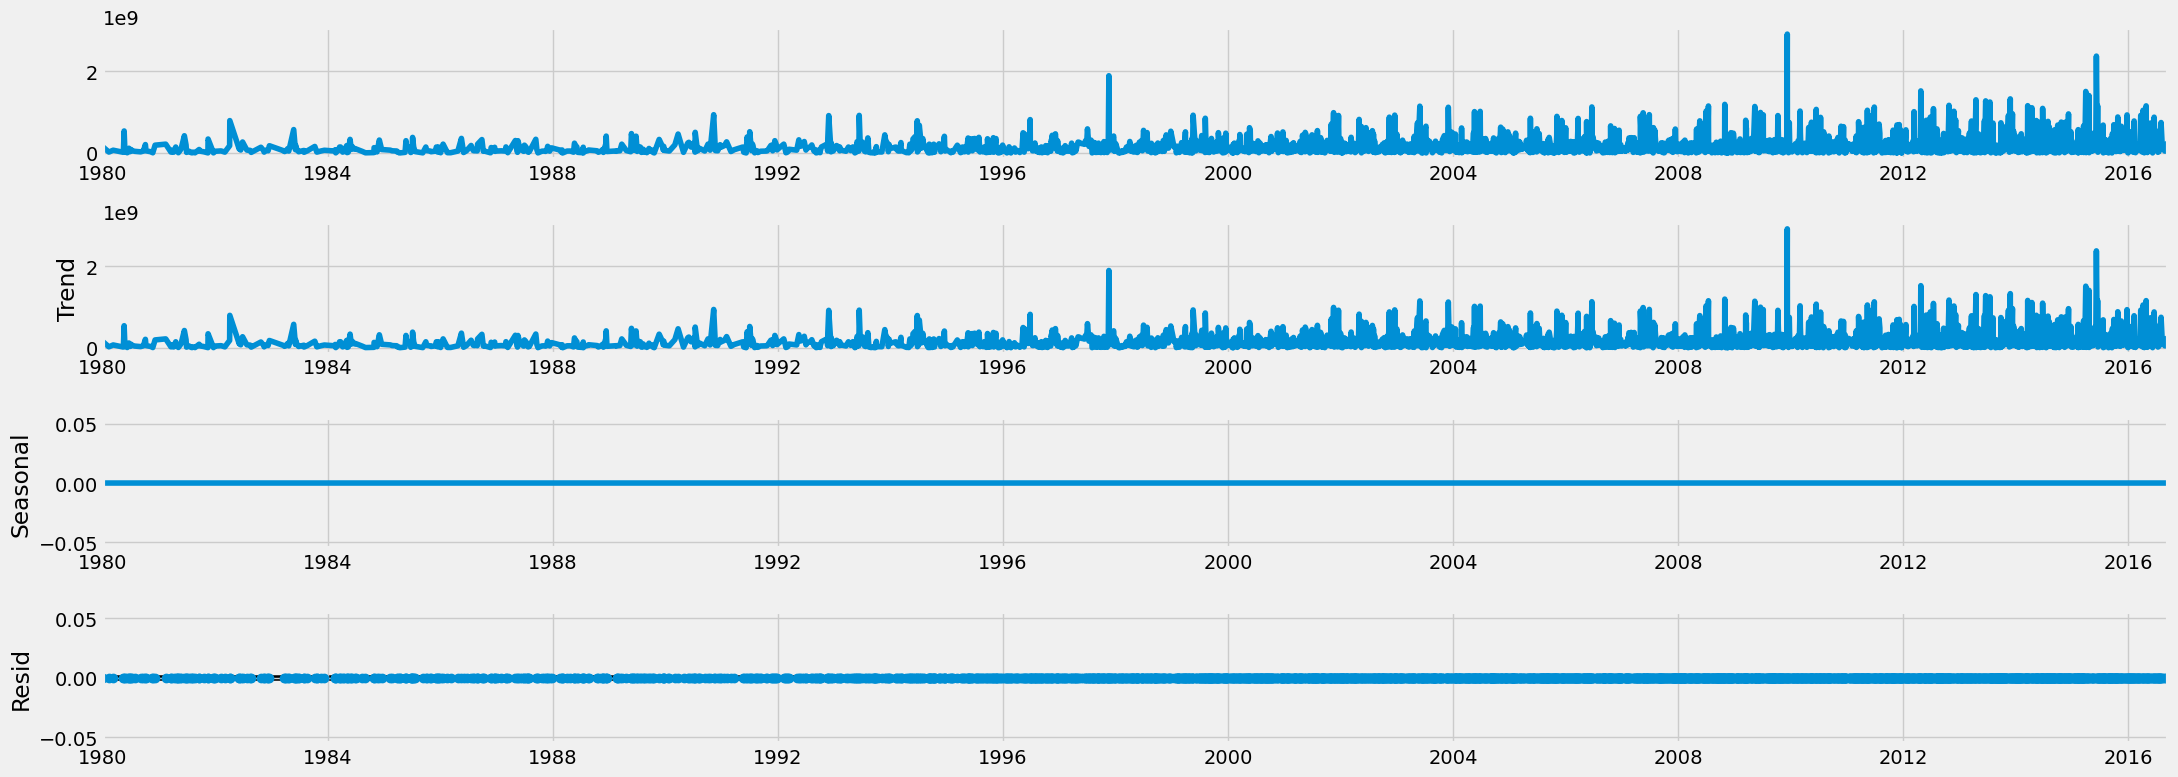

In [54]:
# Decompose time series by using additive model
decomposition = sm.tsa.seasonal_decompose(movie_1980, model='additive', period=1)

# plot the separate components
decomposition.plot()
plt.show()

As showing above figure, the very top first one showing the data itself also named as 'level', and the second chart shows the trend, in this data set we hava the same distribution as 'trend' and 'level' became we use a monthly time series so the data itself is already smoothed.

The third chart seasonal shows a flat line here which means this data set doesn't have time-series' seasonarity, and because of the non-seasonarity for it there won't be any redidul for the data set either.

Next I will check whether the data set is stationary or not.

### Stationary Explore

To check the stationary, I will use the adfuller function to check the summarized statistics, as adfuller consume that there unit root in the data set, so I will compare the p-value and the test statistic value with any of the critical values, then will define whether it is a stationary data set or not from this side.

In [145]:
# Import the adfuller function
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test statistic',
                                        'p-value',
                                        'Number of lags used',
                                        'Number of observations used'])
    for key, value in test[4].items():
        result['Critical Values (%s)'%key] = value
    print(result)

dickey_fuller(movie_1980['revenue'])

Dickey-Fuller Stationarity test:
Test statistic                -1.261461e+01
p-value                        1.627195e-23
Number of lags used            1.100000e+01
Number of observations used    2.856000e+03
Critical Values (1%)          -3.432642e+00
Critical Values (5%)          -2.862553e+00
Critical Values (10%)         -2.567309e+00
dtype: float64


The summarized statistics showed above indicate that the p-value is infinitly close to 0 which is smaller than any of the significant level as 1%, 5% and 10%, and on the another hand, the test value is -12.61 which is also way smaller than any of the critical values as showed. Hence, from this part I can for sure to say this data set is a stationary data set, next I would like to plot the autocreelation to check from that side.

### Autocorrelations

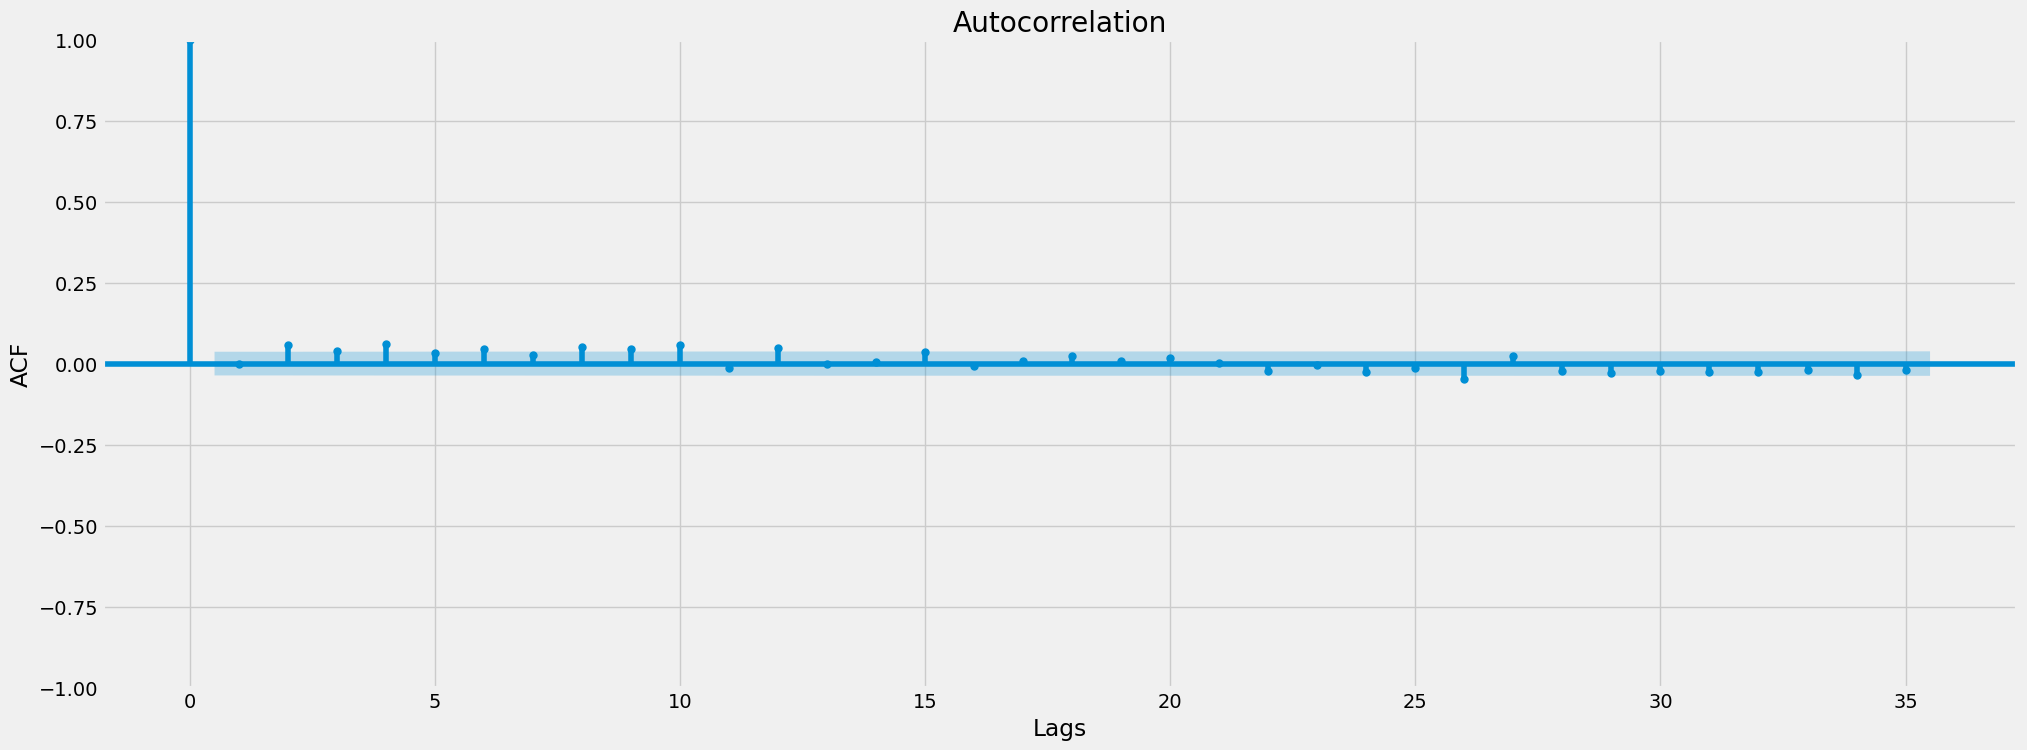

In [116]:
# Import plot_acf to show the autocorrelation
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(movie_1980)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

The vertical lines represent the lags in the series, which the blue area represents the confidence interval. The lines go steadly between each other and there is no such big jump to show except the first one, and the blue edge goes smoothy too, from the autocrelation also proves the data set is stationary too.

## Times-Series Prediction Analysis

As the data set for my project showing stationarity, so it is ready to modeling and predict, I don't need do any more for stationarizing the data set.

In [34]:
import warnings
warnings.filterwarnings('ignore')

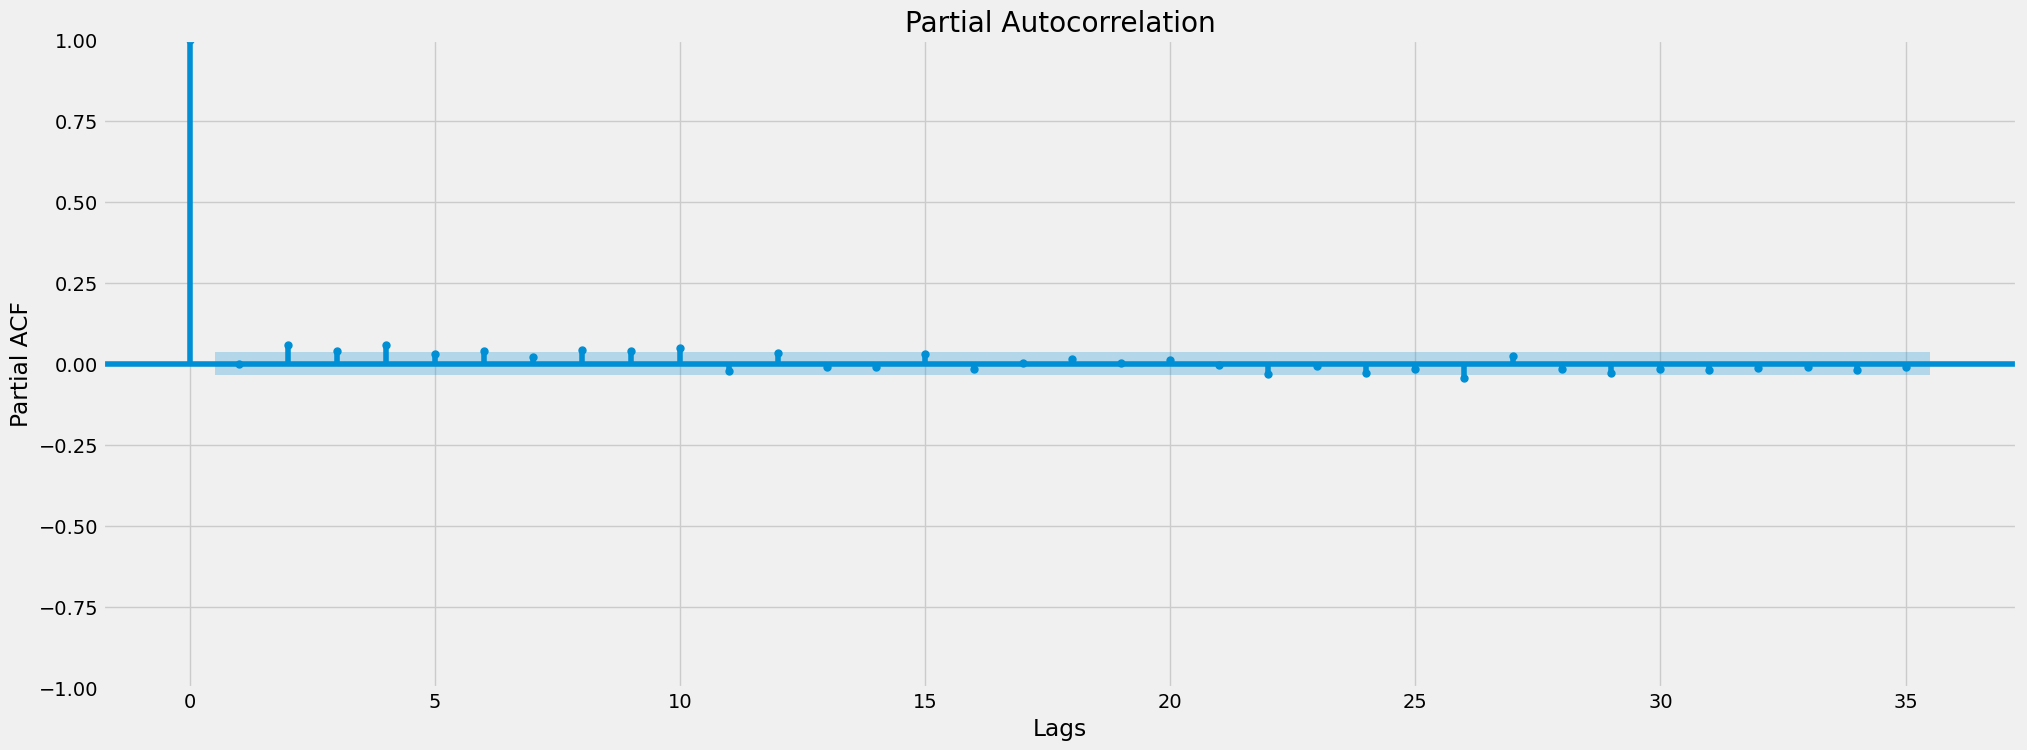

In [115]:
# import the pacf to discover the parameter- q
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(movie_1980)
plt.xlabel('Lags')
plt.ylabel('Partial ACF')
plt.show()

As showing above figure, there are 4 of the vertical blue bars out of the blue edge which means we have number of 4 q-parameter. And, the number of p is 4 too.

### Spliting the data set 

There is a peak appeared in 2010, so the data set will separated into two parts for analyzing use, 1980 to 2010 and 2010 to 2016.

In [40]:
movie_test = movie_1980.query('date_time < "2011-01-01"')
movie_test

,revenue
,sum
date_time,
1980-01-01,145188255.0
1980-02-08,21378361.0
1980-03-07,67182787.0
1980-05-12,15795189.0
1980-05-17,538400000.0
...,...
2010-12-21,310650585.0
2010-12-22,272806121.0


In [119]:
test.shape

(762, 1)

In [41]:
# Split the training set and testing set
train = movie_1980['revenue'][:2107]
test = movie_1980['revenue'][2106:]

### Plot the training and test set

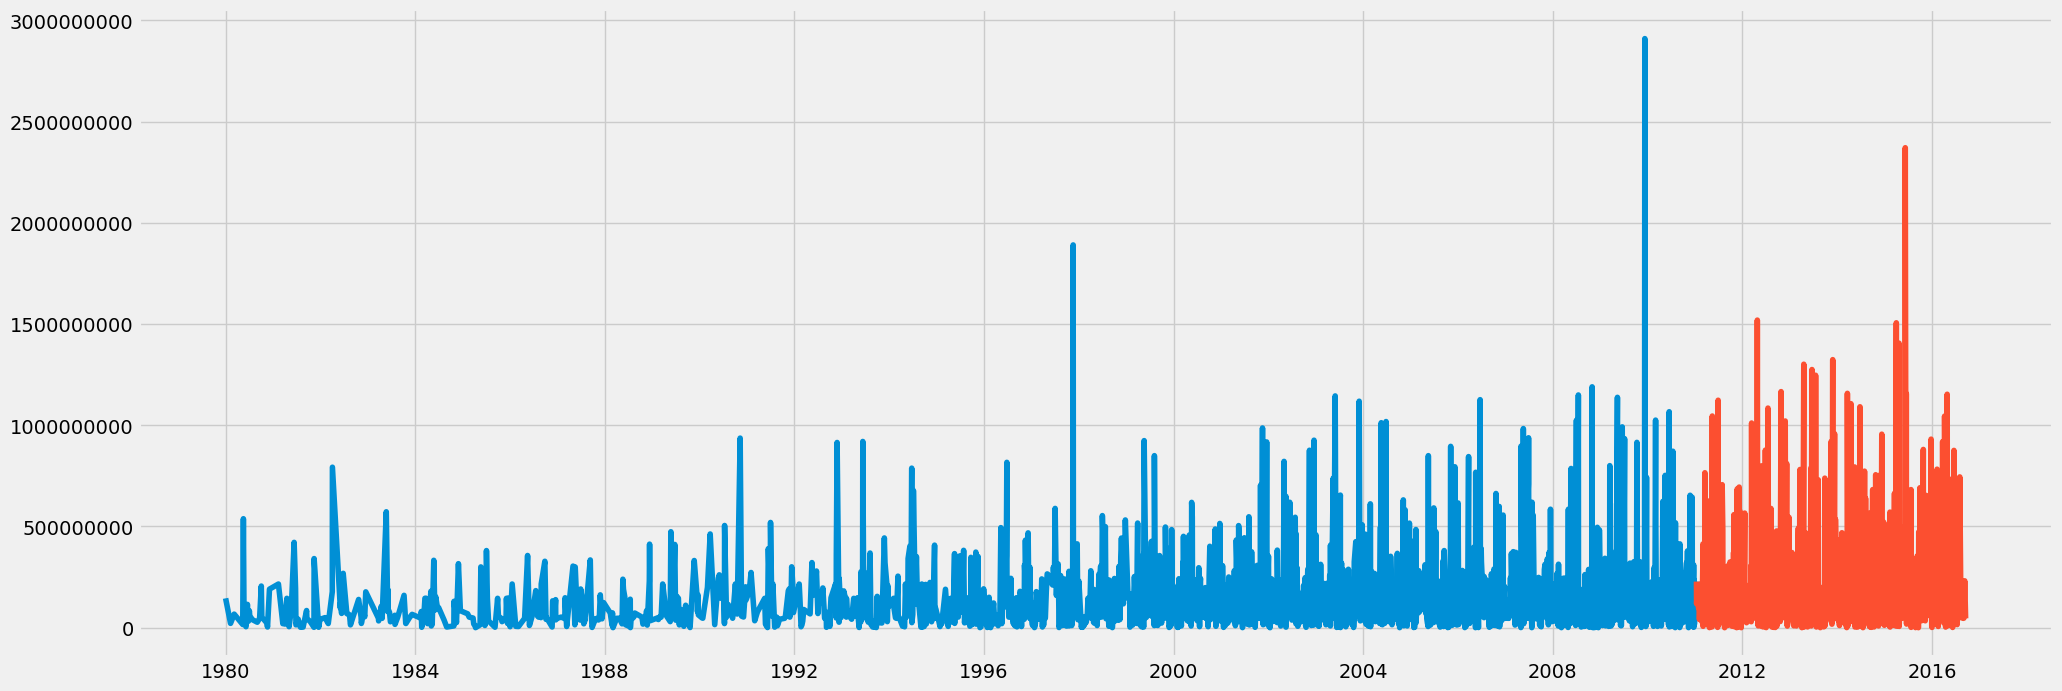

In [57]:
# Plot the train and test set
plt.plot(train)
plt.plot(test)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

### Fitting the model

                               SARIMAX Results                                
Dep. Variable:            revenue_sum   No. Observations:                 2868
Model:                 ARIMA(4, 0, 3)   Log Likelihood              -59033.401
Date:                Sun, 06 Nov 2022   AIC                         118084.802
Time:                        16:20:12   BIC                         118138.454
Sample:                             0   HQIC                        118104.145
                               - 2868                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.635e+08   2.11e-10   7.75e+17      0.000    1.63e+08    1.63e+08
ar.L1         -0.7159      0.059    -12.035      0.000      -0.832      -0.599
ar.L2          0.3849      0.075      5.107      0.0

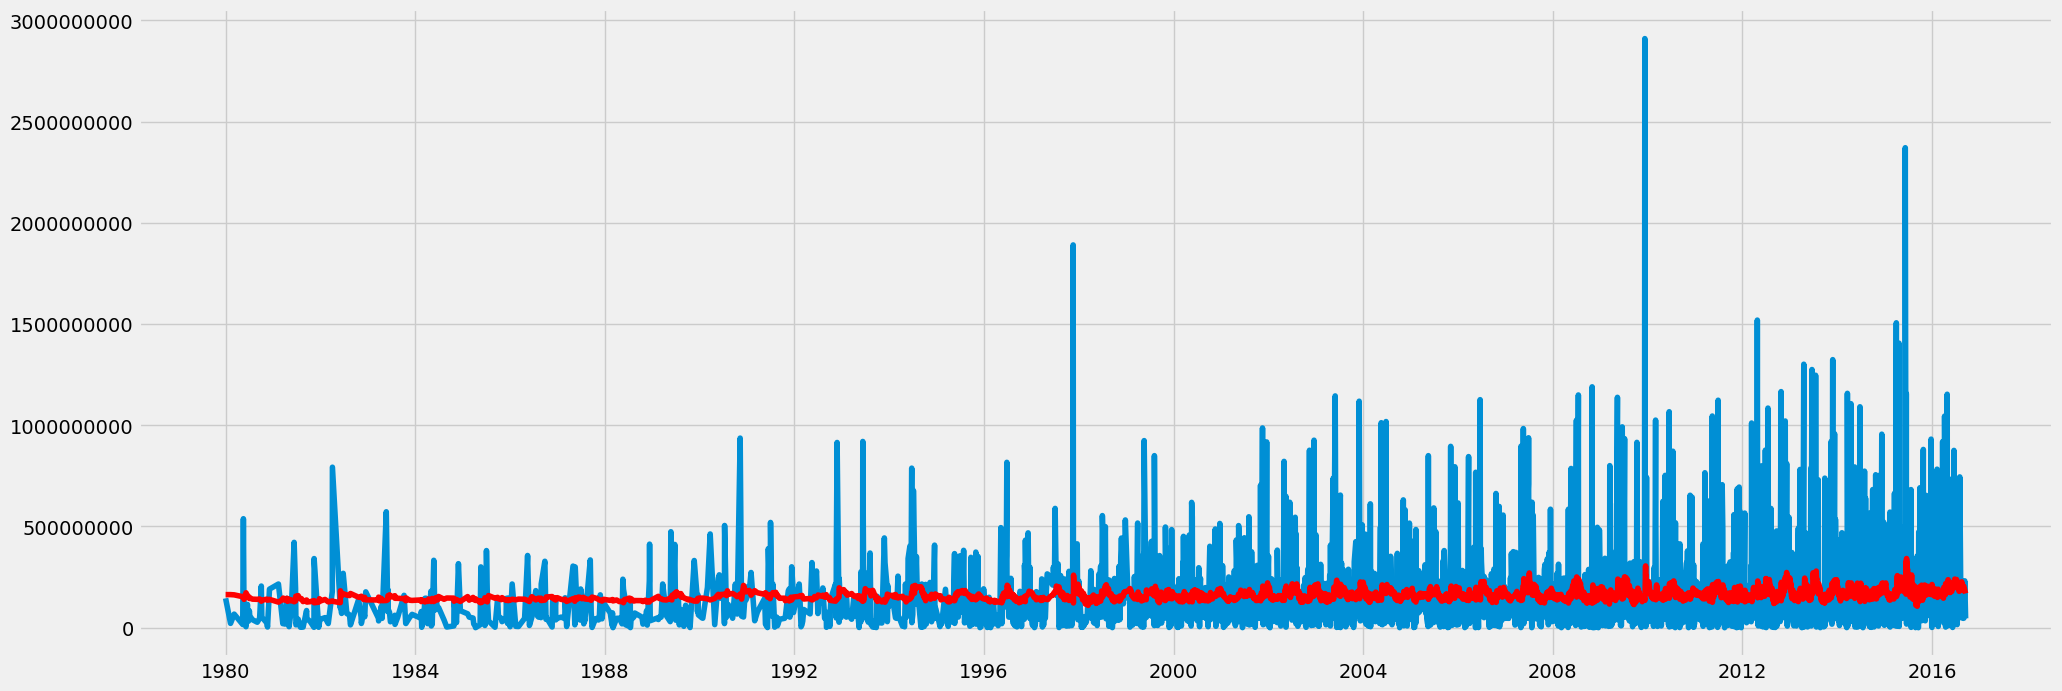

In [155]:
from statsmodels.tsa.api import ARIMA
# ARIMA (p,d,q)
model = ARIMA(movie_1980,order=(4,0,3)) 
model_fit = model.fit()
print(model_fit.summary())
plt.plot(movie_1980)
plt.plot(model_fit.fittedvalues, color='red')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

Actually, the ACF and PACF all plot a cut off figure, so from this part I can't use AR, MA or ARIMA to predict the data set for future. My project will be end here and at least we explored this data set trend and stationarity. Also, from the above figure, the predict line which showed red color is much close with the actual blue lines comparing with the trend waves.